>Goals: 
1. To convert volts to protons (for the intensity meter)
2. To interpolate a graph of the energy in the synchrotron
3. To work with group F to convert volts to protons (for the BLMs)

In [1]:
import glob
import pandas as pd
import random
import paho.mqtt.client as mqtt
import string
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange

In [2]:
files = glob.glob("C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle" + '/*.csv')

In [3]:
for file in files:
    print(file)

C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_36_034042.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_36_926089.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_38_236517.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_39_115167.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_39_949234.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_41_013048.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_42_031331.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_43_025596.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_44_019355.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_45_049643.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_45_987319.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_48_010611.csv
C:/Users/lcd12968/Desktop/BLM_R5IM_Data/cycle\26_05_2023_00_35_48_369257.csv

In [4]:
selected_file = files[0]

In [5]:
input_data = pd.read_csv(selected_file)
dataframe = input_data.drop(columns = input_data.columns[0]).to_numpy()

In [6]:
print(dataframe)

[[-4.99939013e+00 -4.99939013e+00 -4.99939013e+00 ... -4.99939013e+00
  -4.99939013e+00 -4.99939013e+00]
 [-6.70999987e-03 -4.87999991e-03 -4.26999992e-03 ... -5.48999989e-03
  -4.87999991e-03 -4.26999992e-03]
 [-3.04999994e-03  6.09999988e-04  1.21999998e-03 ...  4.26999992e-03
   4.26999992e-03  6.09999988e-04]
 ...
 [-3.04999994e-03  1.21999998e-03  2.43999995e-03 ...  2.43999995e-03
  -1.21999998e-03  0.00000000e+00]
 [-1.21999998e-03 -1.21999998e-03  6.09999988e-04 ... -6.70999987e-03
  -4.87999991e-03 -4.87999991e-03]
 [ 3.53999995e-02  3.53999995e-02  3.60100009e-02 ...  2.31899992e-02
   2.31899992e-02  2.31899992e-02]]


In [7]:
R5IM_calibration_coefficient = 4E12
yArray = []
print(len(dataframe))
print(len(dataframe[0]))

40
2200


>NOTES: Created a graph to show the voltage read on the intensity monitor - energy-independent (to initially check the data)

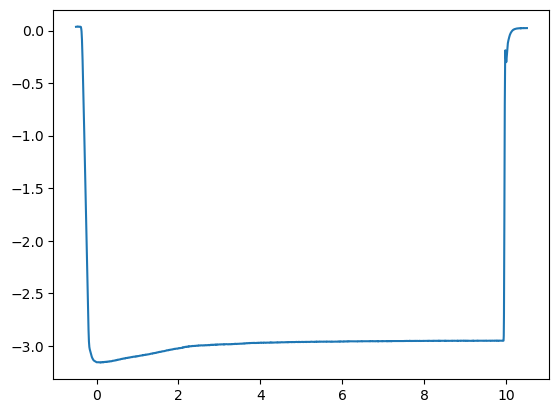

In [8]:
x = np.linspace(-0.5,10.5,2200)
plt.plot(x, dataframe[39])

Text(0, 0.5, 'protons')

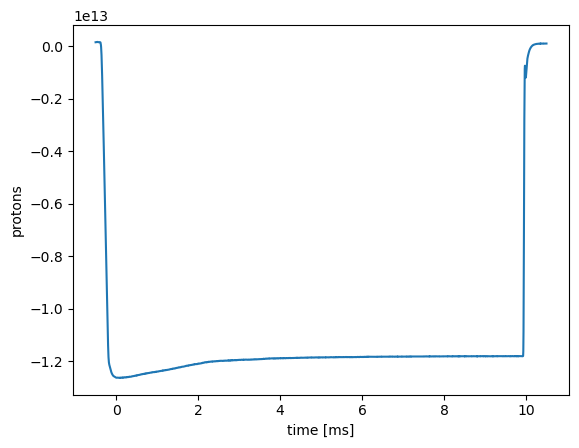

In [9]:
protons = dataframe[39] * R5IM_calibration_coefficient
plt.plot(x, protons)
plt.xlabel('time [ms]')
plt.ylabel('protons')

In [10]:
%%html 
<iframe src="https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html" width=864.0 height=576.0></iframe>

Options for interpolation in Python:

1. Linear Interpolation

2. Cubic Spline Interpolation

3. Lagrange Polynomial Interpolation

4. Newton's Polynomial Interpolation

>Used given energy data to create points plot

In [11]:
import numpy as np
calibration_energy = np.array([70, 172, 374, 617, 780])
calibration_data = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11]) 

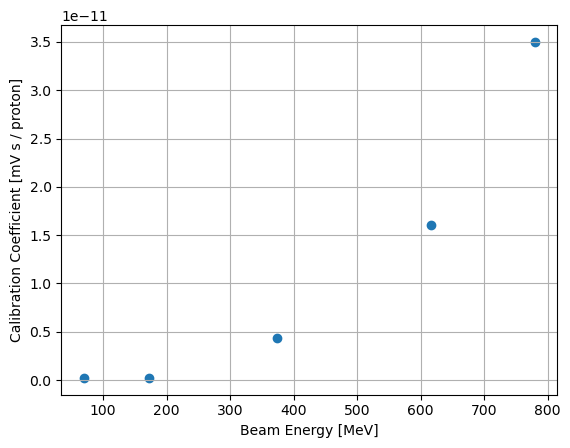

In [12]:
import matplotlib.pyplot as plt
plt.scatter(calibration_energy, calibration_data);
plt.xlabel('Beam Energy [MeV]');
plt.ylabel('Calibration Coefficient [mV s / proton]');
plt.grid()

>Using linear interpolation (where data points are joined using straight lines)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

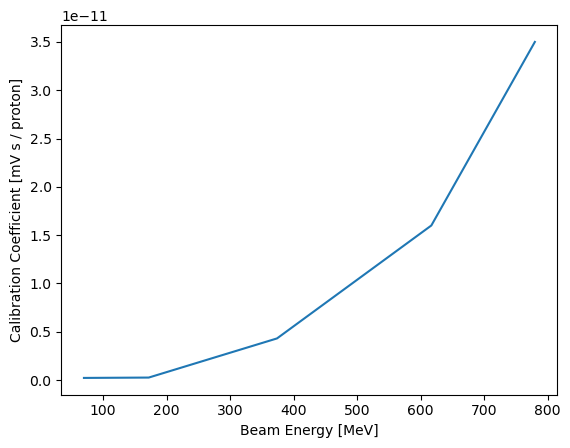

In [14]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+1]-x[i])
    return coef

def newton_poly(coef, mstime, x):
    n = len(mstime) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -mstime[n-k])*p
    return p

mstime = np.linspace(-0.5,10.5,2200)
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

a_s = divided_diff(x, y)[0, :]


x_new = np.arange(70, 780, 0.1)
y_new = newton_poly(a_s, x, x_new)

plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mV s / proton]')
plt.plot(x,y)

>If the maximum beam energy is changed to 700MeV, the calibration coefficient would have a lower maximum value, and therefore the maximum protons in the synchrotron is lowered.

>If we do not acelerate the particles (if the beam energy does not change), the beam energy would remain at 70MeV, and therefore the calibration coefficient would remain the same.

In [15]:
from scipy.interpolate import CubicSpline

In [16]:
f = CubicSpline(x, y, bc_type='natural')

x = [70, 172, 374, 617, 780]
y = [2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11]
#highest_energy = float(input('What is the highest beam energy? '))
x_new = np.arange(70, 780, 0.1)
y_new = f(x_new)

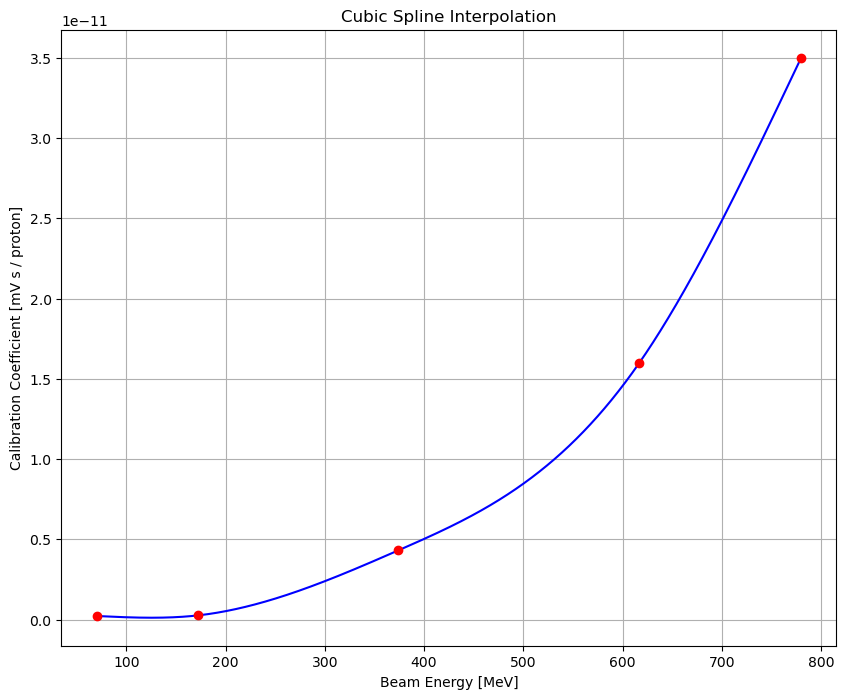

In [17]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mV s / proton]')
plt.grid()

>Testing the cubic spline interpolation graph

In [18]:
from scipy.interpolate import CubicSpline

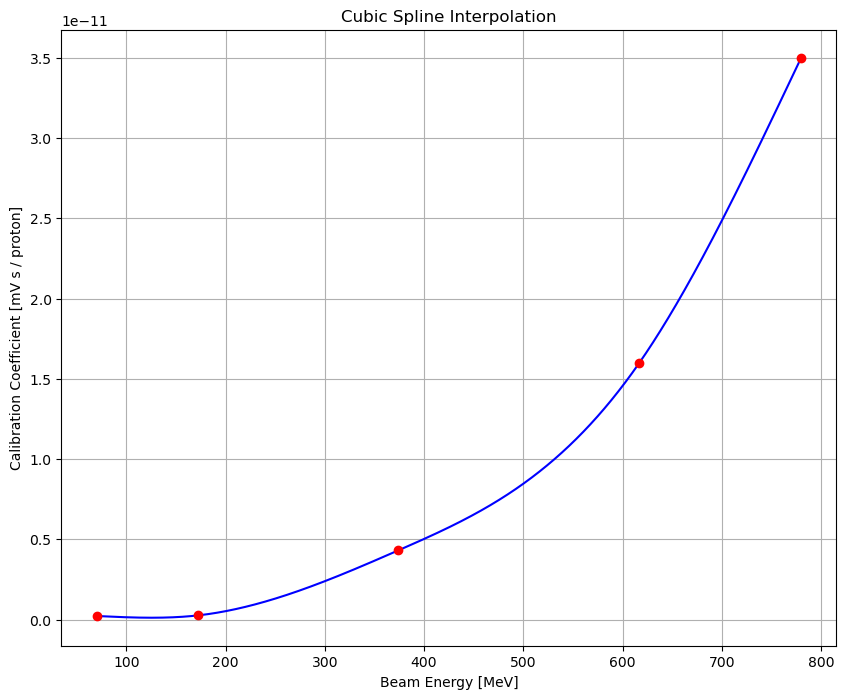

In [19]:
f = CubicSpline(x, y, bc_type='natural') #CubicSpline creates cubic functions between data points
#(374, 4.31E-12)
x = [70, 172, 617, 780]
y = [2.22E-13, 2.59E-13, 1.60E-11, 3.50E-11]
#highest_energy = float(input('What is the highest beam energy? '))
x_new = np.arange(70, x[len(x)-1], 0.1)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mV s / proton]')
plt.grid()
plt.plot(374, 4.31E-12, 'ro')

>To test the accuracy of the cubic spline interpolation method, we removed one of the coordinates from the array and plotted it individually to see whether it remained on the plotted line. 

>As shown in the graph, the shape of the line changed and the coordinate no longer lay on the interpolation line, hence the cubic spline interpolation method was inaccurate.

In [20]:
# def divided_diff(x, y): #creates divided differences between data points
#     n = len(y) 
#     coef = np.zeros([n, n])
#     coef[:,0] = y
    
#     for j in range(1,n):
#         for i in range(n-j):
#             coef[i][j] = \
#            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
#     return coef

# def newton_poly(coef, mstime, x): 
#     n = len(mstime) - 1 
#     p = coef[n]
#     for k in range(1,n+1):
#         p = coef[n-k] + (x -mstime[n-k])*p
#     return p

# x = np.array([70, 172, 374, 617, 780])
# y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
# # get the divided difference coef
# a_s = divided_diff(x, y)[0, :]
# #(617, 1.60E-11)
# # evaluate on new data points
# x_new = np.array(np.linspace(70, 800, 2200))
# y_new = newton_poly(a_s, x, x_new)
# #points = np.linspace(70, 800, 2200)
# for i in range(2200):
#     y = divided_diff(x_new, y)
#     print(y)
# plt.figure(figsize = (12, 8))
# plt.plot(x, y, 'bo')
# plt.plot(x_new, y_new)
# plt.xlabel('Beam Energy [MeV]')
# plt.ylabel('Calibration Coefficient [mVs/proton]')

>Removing the fourth point from the graph also showed that the Newton Polynomial method of interpolation had a degree of inaccuracy. We concluded that this method of testing was not the most effective way of detecting inaccuracies and identifying the most accurate interpolation method. 

In [21]:
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
f = lagrange(x, y)#lagrange function generates one polynomial which would pass through all data points
x_new = np.array(np.linspace(70, 800, 2200))
fig = plt.figure(figsize = (12,8))
x_new = np.arange(70, 800, 0.331818181818)
for i in range(x_new):
    x = np.linspace(70, 800, 2200)
#plt.plot(x, f, 'b')

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 1200x800 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (12,8))
plt.grid()
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Beam Energy with a Lagrange Polynomial Interpolation Curve')
plt.xlabel('Beam Energy [MeV]')
plt.ylabel('Calibration Coefficient [mVs/proton]')

In [ ]:
y0_0 = 1
y1_90 = 0
y2_180 = -1
y3_270 = 0
y4_360 = 1
y5_30 = 0.866025404
y = np.array([y0_0, y1_90, y2_180, y3_270, y4_360, y5_30])
x = np.array([0, 90, 180, 270, 360, 30])
f = lagrange(x, y)
print(f)
x_new = np.arange(0, 360, 0.1)
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
#x = np.array([0, 90, 180, 270, 360])
#cosine = np.cos(x*np.pi/180)
#plt.plot(x, cosine, 'ro')
#plt.plot(x, cosine, 'b')
#plt.grid()

In [ ]:
# def divided_diff(x, y): #creates divided differences between data points
#     n = len(y) 
#     coef = np.zeros([n, n])
#     coef[:,0] = y
    
#     for j in range(1,n):
#         for i in range(n-j):
#             coef[i][j] = \
#            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
#     return coef

# def newton_poly(coef, mstime, x): 
#     n = len(mstime) - 1 
#     p = coef[n]
#     for k in range(1,n+1):
#         p = coef[n-k] + (x -mstime[n-k])*p
#     return p

# x = np.array([0, 90, 180, 270, 360])
# y = np.array([y0_0, y1_90, y2_180, y3_270, y4_360])
# # get the divided difference coef
# a_s = divided_diff(x, y)[0, :]
# #(617, 1.60E-11)
# # evaluate on new data points
# x_new = np.arange(0, 360, 0.1)
# y_new = newton_poly(a_s, x, x_new)

# plt.figure(figsize = (12, 8))
# plt.plot(x, y, 'bo')
# plt.plot(x_new, y_new)
# plt.xlabel('Beam Energy [MeV]')
# plt.ylabel('Calibration Coefficient [mVs/proton]')

## Function to interpolate data on curve

In [22]:
# data_points = 10
# x_new = np.linspace(0, data_points-1, data_points, dtype=int)
# x_new

[-55.         -54.63288965 -54.2657793  ... 799.2657793  799.63288965
 800.        ]
[2.50000000e-12 2.48960238e-12 2.47922496e-12 ... 3.84894321e-11
 3.85593671e-11 3.86294352e-11]
69.81751824817518 2.2341931966854255e-13
70.18462859596393 2.2056962857007914e-13
70.55173894375268 2.177423870509932e-13
70.91884929154142 2.1493758791987788e-13
71.28595963933017 2.1215522392536743e-13
71.65306998711893 2.0939528775632623e-13
72.02018033490768 2.066577720420314e-13
72.38729068269643 2.0394266935236052e-13
72.75440103048518 2.0124997219797875e-13
73.12151137827394 1.9857967303052412e-13
73.48862172606269 1.95931764242795e-13
73.85573207385144 1.9330623816893462e-13
74.22284242164017 1.9070308708461856e-13
74.58995276942892 1.881223032072413e-13
74.95706311721767 1.8556387869610156e-13
75.32417346500642 1.8302780565259023e-13
75.69128381279518 1.8051407612037407e-13
76.05839416058393 1.7802268208558511e-13
76.42550450837268 1.755536154770045e-13
76.79261485616144 1.7310686816624946e-13
77.1

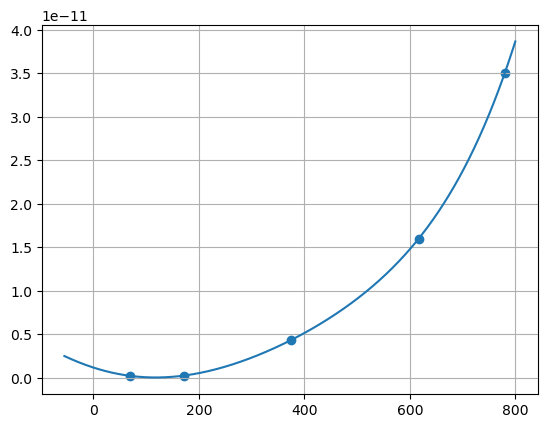

In [23]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

def calibration_curve_beta(data_points):
    '''
    #takes the given data and interpolates it by the newton polynomial method
    '''    
    x = np.array([-55, 70, 172, 374, 617, 780])
    y = np.array([2.50E-12, 2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
    
    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(-55, 800, data_points) # to change number of datapoints change interval of x_new (third number)
    return newton_poly(a_s, x, x_new)

plt.grid()
data_points = 2330
x_new = np.linspace(-55, 800, data_points)
newton_poly(a_s, x, x_new)
x_data = np.linspace(-55, 800, data_points)
print(x_data)
print(calibration_curve_beta(len(x_data)))
plt.plot(x_data, calibration_curve_beta(len(x_data)))
plt.scatter(x,y)
for i in range(340, 370):
    print(x_data[i], calibration_curve_beta(len(x_data))[i])
# plt.scatter(-55, 2.50E-12)
# plt.scatter(70, 2.22E-13)
# plt.scatter(172, 2.59E-13)
# plt.scatter(374, 4.31E-12)
# plt.scatter(617, 1.60E-11)
# plt.scatter(780, 3.50E-11)
# print(calibration_curve_beta(len(x_data)))

In [24]:
# x = np.array([70, 172, 374, 617, 780])
# y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

# a_s = divided_diff(x, y)[0, :]

In [25]:
# x_new = np.linspace(70, 800, data_points)

In [26]:
# newton_poly(a_s, x, x_new)

In [27]:
data_points = int(input('Enter the number of data points: '))

Enter the number of data points: 


ValueError: invalid literal for int() with base 10: ''

In [28]:
x_new = np.linspace(70, 800, data_points) # to change number of datapoints change interval of x_new (third number)
newton_poly(a_s, x, x_new)

array([2.22000000e-13, 1.46576483e-13, 7.18347846e-14, ...,
       4.16402200e-10, 4.17772463e-10, 4.19145826e-10])

In [29]:
calibration_curve_beta(10)

array([2.50000000e-12, 5.30382763e-13, 6.05829744e-14, 9.47956230e-13,
       2.92765523e-12, 5.82883815e-12, 9.79087709e-12, 1.54795664e-11,
       2.43033311e-11, 3.86294352e-11])

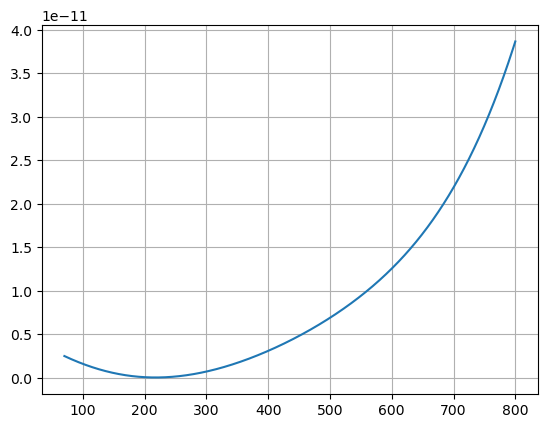

In [30]:
x_data = np.linspace(70, 800, data_points)
plt.grid()
plt.plot(x_data, calibration_curve_beta(len(x_data)))

## Function to change top energy

>I added a fourth function to the Newton Polynomial interpolation method which allowed the user to change the maximum beam energy.

>They were also allowed to set the maximum beam energy to 70MeV, hence the beam energy remained at injection energy.

Enter the number of data points: 2200
Enter the top beam energy700
[ 70.          70.28649386  70.57298772 ... 699.42701228 699.71350614
 700.        ]
[2.22000000e-13 2.18506379e-13 2.15041157e-13 ... 3.83430485e-11
 3.84029802e-11 3.84629996e-11]
[ 70.          70.33196908  70.66393815 ... 799.33606185 799.66803092
 800.        ]
[2.22000000e-13 2.18506379e-13 2.15041157e-13 ... 3.83430485e-11
 3.84029802e-11 3.84629996e-11]


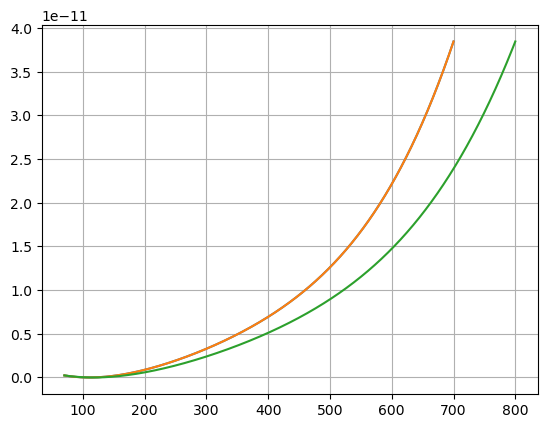

In [32]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

def calibration_curve_beta(data_points):
    '''
    takes the given data and interpolates it by the newton polynomial method
    '''    
    x = np.array([70, 172, 374, 617, 780])
    y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
    
    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(70, 800, data_points) # to change number of datapoints change interval of x_new (third number)
    return newton_poly(a_s, x, x_new)

def change_top_energy(data_points):
    '''
    changes top energy of beam (keeps line shape and calibration coefficient at intervals the same) and outputs new data points
    '''
    topEnergy = int(input('Enter the top beam energy'))
    x_data = np.linspace(70, topEnergy, data_points)
    print(x_data)
    print(calibration_curve_beta(data_points))
    plt.plot(x_data, calibration_curve_beta(data_points))
    return topEnergy

data_points = int(input('Enter the number of data points: '))
plt.grid()
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])
x_new = np.linspace(70, 800, data_points)
newton_poly(a_s, x, x_new)
x_data = np.linspace(70, 800, data_points)
topEnergy = change_top_energy(data_points)
w_data = np.linspace(70, topEnergy, data_points)
plt.plot(w_data, calibration_curve_beta(len(x_data)))
print(x_data)
print(calibration_curve_beta(len(x_data)))
plt.plot(x_data, calibration_curve_beta(len(x_data)))
#plt.scatter(x,y)    
# change_top_energy(data_points)
# w_data = np.linspace(70, 800, data_points)
# plt.plot(w_data, calibration_curve_beta(len(x_data)))